## Week 12 Assignment - W200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. This assignment addresses material covered in Unit 11. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class. Do **NOT** push/upload the data file. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. 

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types.

C:\Users\Austin Jin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-1-c73359f6f5fc>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


(1125659, 18)


In [2]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [3]:
# 1a YOUR CODE HERE

#print the shape of data
#This stores the number of rows and columns as a tuple (number of rows, number of columns) . It is also possible to unpack and store them in separate variables.
print(contrib.shape)

#print the column names
column_names = list(contrib.columns.values)
print(column_names)

(654502, 18)
['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp']


`1a YOUR RESPONSE HERE`
Number of rows : 654502, Number of columns: 18

Based on the documentation, the list results out all of the expected columns: cmte_id, cand_id, cand_nm, contbr_nm, contbr_city, contbr_st, contbr_zip, contbr_employer, contbr_occupation, contb_receipt_amt, contb_receipt_dt, receipt_desc, memo_cd, memo_text, form_tp, file_num, tran_id, and election_tp.

The election_tp column contains the election type for which the contribution was made along with with the election year. The election type could be (P)rimary, (G)eneral, (O)ther, (C)onvention, (R)unoff, (S)pecial, or (R)ecount. For example, 'P2016' would mean Primary Election in 2016 and 'G2016' would mean General Election in 2016.

**1b. Print the first 5 rows from the dataset to manually check some of the data.** 

This is a good idea to ensure the data loaded and the columns parsed correctly!

In [4]:
# 1b YOUR CODE HERE

print(contrib.head(5))

     cmte_id    cand_id                  cand_nm          contbr_nm  \
0  C00575795  P00003392  Clinton, Hillary Rodham         AULL, ANNE   
1  C00575795  P00003392  Clinton, Hillary Rodham  CARROLL, MARYJEAN   
2  C00575795  P00003392  Clinton, Hillary Rodham   GANDARA, DESIREE   
3  C00577130  P60007168         Sanders, Bernard          LEE, ALAN   
4  C00577130  P60007168         Sanders, Bernard   LEONELLI, ODETTE   

     contbr_city contbr_st     contbr_zip            contbr_employer  \
0       LARKSPUR        CA 949,391,913.00                        NaN   
1        CAMBRIA        CA 934,284,638.00                        NaN   
2        FONTANA        CA 923,371,507.00                        NaN   
3      CAMARILLO        CA 930,111,214.00  AT&T GOVERNMENT SOLUTIONS   
4  REDONDO BEACH        CA 902,784,310.00   VERICOR ENTERPRISES INC.   

   contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0            RETIRED              50.00       2016-04-26   

**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use the three markdown cells below to explain if your **three** chosen variables "pass" your sanity checks or if you have concerns about the integrity of your data and why. 

In [5]:
# 1c YOUR CODE HERE for variable #1

# group by and count 
print(contrib.groupby(['election_tp']).size())

contrib_filtered = contrib[contrib['election_tp'] == 'P2016']

#contrib_filtered should return 649293 rows × 18 columns as expected
contrib_filtered

election_tp
G2016      5064
P2016    649293
P2020         7
dtype: int64


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125654,C00573519,P60005915,"Carson, Benjamin S.","HENDERSON, YVONNE MRS.",REDONDO BEACH,CA,902781750,RETIRED,RETIRED,200.00,2016-01-29,NaN,NaN,NaN,SA17A,1073637,SA17.1185074,P2016
1125655,C00573519,P60005915,"Carson, Benjamin S.","HENDRICKS, JIM C. MR.",ETNA,CA,960270030,RETIRED,RETIRED,25.00,2016-01-06,NaN,NaN,NaN,SA17A,1073637,SA17.1120355,P2016
1125656,C00573519,P60005915,"Carson, Benjamin S.","HENDRICKS, JIM C. MR.",ETNA,CA,960270030,RETIRED,RETIRED,25.00,2016-01-12,NaN,NaN,NaN,SA17A,1073637,SA17.1131185,P2016
1125657,C00573519,P60005915,"Carson, Benjamin S.","HENDRICKS, JIM C. MR.",ETNA,CA,960270030,RETIRED,RETIRED,50.00,2016-01-21,NaN,NaN,NaN,SA17A,1073637,SA17.1156676,P2016


In [12]:
# 1c YOUR CODE HERE for variable #2

# group by and count rows for each candidate id and name
candidate_id_name = contrib.groupby(['cand_id', 'cand_nm']).size()

print(candidate_id_name)

cand_id    cand_nm                  
P00003392  Clinton, Hillary Rodham      163509
P20002671  Johnson, Gary                    77
P20002721  Santorum, Richard J.             84
P20003281  Perry, James R. (Rick)          116
P20003984  Stein, Jill                     197
P40003576  Paul, Rand                     4256
P60003670  Kasich, John R.                2988
P60005915  Carson, Benjamin S.           27342
P60006046  Walker, Scott                   713
P60006111  Cruz, Rafael Edward 'Ted'     57136
P60006723  Rubio, Marco                  14089
P60007168  Sanders, Bernard             371795
P60007242  Fiorina, Carly                 4696
P60007572  Pataki, George E.                20
P60007671  O'Malley, Martin Joseph         397
P60007697  Graham, Lindsey O.              342
P60008059  Bush, Jeb                      3114
P60008398  Jindal, Bobby                    31
P60008521  Christie, Christopher J.        333
P60008885  Webb, James Henry Jr.           106
P60009685  Lessig, Lawr

In [13]:
# 1c YOUR CODE HERE for variable #3

#To check for any null values in the contb_receipt_amt column
check_null_receipt_amt = contrib_filtered['contb_receipt_amt'].isnull().values.any()

print(check_null_receipt_amt)

False


`1c YOUR RESPONSE HERE`

For variable 1:

G2016 had a total of 5064, P2016 had a total of 649293, and P2020 had a total of 7. As expected, P2016 had the most and since we are focused on analysing data for Primary Races in 2016 only, we may remove the data results for G2016 and P2020.

For variable 2:

There are no ambiguous names and id pairs in the data.

For variable 3:

After checking for any ambiguous or null values in the contb_receipt_amt column, the dataset doesn’t have any null values or any missing data for this column which is important for our analysis.

**1d. Plotting a histogram** 

Make a histogram of **one** of the variables you picked above. What are some insights that you can see from this histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

Text(0, 0.5, 'Number of People Contributing')

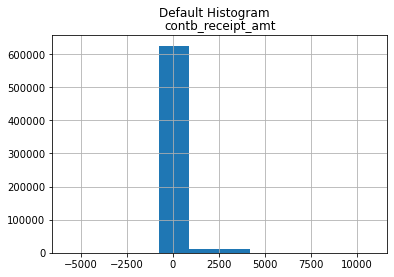

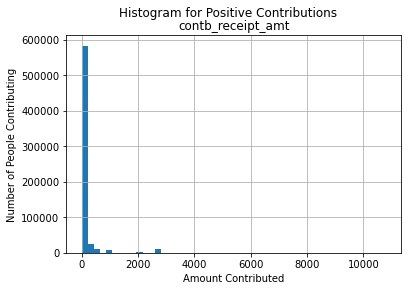

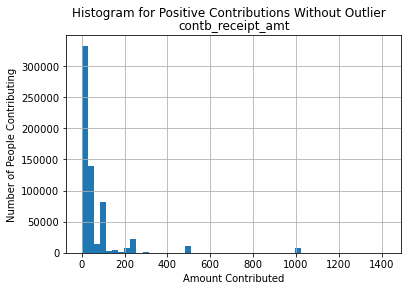

In [14]:
# 1d YOUR CODE HERE
import numpy as np
from scipy import stats

plot = contrib_filtered.hist(column='contb_receipt_amt')
plt.suptitle('Default Histogram')

positive = contrib_filtered[contrib_filtered['contb_receipt_amt'] > 0 ]
positive.hist(column='contb_receipt_amt',bins=50)
plt.suptitle('Histogram for Positive Contributions')
plt.xlabel('Amount Contributed')
plt.ylabel('Number of People Contributing')

outlier_removed = positive[np.abs(stats.zscore(positive['contb_receipt_amt'])) < 3]
outlier_removed.hist(column='contb_receipt_amt',bins=50)
plt.suptitle('Histogram for Positive Contributions Without Outlier')
plt.xlabel('Amount Contributed')
plt.ylabel('Number of People Contributing')

`1d YOUR RESPONSE HERE`

•	Most of the contribution is in the range between 0 to 1420
•	Max amount contributed is 10800.00 which is one of the outlier
•	6204 contributions are negative (Won't be able to see it on histogram due to only generating positive contributions and removing outliers. The same can be applied to view negative contributions only with outliers removed.)
•	Few people have made multiple contributions to the same candidate (Since we are only able to see the contribution amounts by many people, small number of particular contributions won't be visible due to applied plotting restrictions.)

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [15]:
# 2a YOUR CODE HERE


#ASSUMPTION: The question is asking for "largest number of contribtions" and not the actual amounts in the "contb_receipt_amt" column so the size for the cand_nm column has been used in the groupby clause. If the question specified for the largest amount of contributions, then the contb_receipt_amt would've been used.
df = pd.DataFrame({'num_of_contribution' : contrib_filtered.groupby( ['cand_nm'] ).size()}).sort_values(by='num_of_contribution',ascending=False).reset_index()

df

,cand_nm,num_of_contribution
0,"Sanders, Bernard",371794
1,"Clinton, Hillary Rodham",160698
2,"Cruz, Rafael Edward 'Ted'",56347
3,"Carson, Benjamin S.",27015
4,"Rubio, Marco",13267
5,"Fiorina, Carly",4679
6,"Paul, Rand",4164
7,"Bush, Jeb",3056
8,"Kasich, John R.",2941
9,"Trump, Donald J.",2169


`2a YOUR RESPONSE HERE`

Based on the dataframe above, Sanders, Bernard has raised largest "number" of contributions.

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [16]:
# 2b YOUR CODE HERE

Dff = contrib_filtered.groupby(['cand_nm']).contb_receipt_amt.sum().sort_values(ascending=False).reset_index()

Dff

,cand_nm,contb_receipt_amt
0,"Clinton, Hillary Rodham","37,862,356.35"
1,"Sanders, Bernard","18,773,861.31"
2,"Cruz, Rafael Edward 'Ted'","5,928,828.27"
3,"Rubio, Marco","5,000,680.92"
4,"Bush, Jeb","3,316,836.83"
5,"Carson, Benjamin S.","3,022,105.15"
6,"Kasich, John R.","1,505,171.54"
7,"Fiorina, Carly","1,473,989.42"
8,"Paul, Rand","721,563.14"
9,"Trump, Donald J.","696,727.30"


`2b YOUR RESPONSE HERE`

Based on the dataframe above, Clinton, Hillary Rodham has raised the "most money" in terms of amount in California.

**2c. Combine the tables (sorted by either a or b above).**

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [17]:
# 2c YOUR CODE HERE

df.columns = ['candidate_name', 'count_of_donation']
Dff.columns = ['candidate_name', 'value_of_donation']

track_donations = pd.merge(df, Dff, on='candidate_name')

track_donations

,candidate_name,count_of_donation,value_of_donation
0,"Sanders, Bernard",371794,"18,773,861.31"
1,"Clinton, Hillary Rodham",160698,"37,862,356.35"
2,"Cruz, Rafael Edward 'Ted'",56347,"5,928,828.27"
3,"Carson, Benjamin S.",27015,"3,022,105.15"
4,"Rubio, Marco",13267,"5,000,680.92"
5,"Fiorina, Carly",4679,"1,473,989.42"
6,"Paul, Rand",4164,"721,563.14"
7,"Bush, Jeb",3056,"3,316,836.83"
8,"Kasich, John R.",2941,"1,505,171.54"
9,"Trump, Donald J.",2169,"696,727.30"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [18]:
# 2d YOUR CODE HERE

track_donations['average_donation'] = track_donations['value_of_donation'] / track_donations['count_of_donation']

track_donations = track_donations.sort_values(by='average_donation',ascending=False).reset_index()

track_donations

,index,candidate_name,count_of_donation,value_of_donation,average_donation
0,23,"Gilmore, James S III",3,"8,100.00","2,700.00"
1,18,"Perry, James R. (Rick)",104,"208,400.00","2,003.85"
2,22,"Pataki, George E.",20,"30,450.00","1,522.50"
3,14,"Christie, Christopher J.",333,"456,066.00","1,369.57"
4,15,"Graham, Lindsey O.",305,"379,495.00","1,244.25"
5,7,"Bush, Jeb",3056,"3,316,836.83","1,085.35"
6,12,"O'Malley, Martin Joseph",392,"297,334.26",758.51
7,21,"Jindal, Bobby",31,"23,231.26",749.40
8,10,"Walker, Scott",664,"492,606.90",741.88
9,17,"Webb, James Henry Jr.",106,"76,568.16",722.34


**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Hint: Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

Text(0, 0.5, 'Amount of Donation')

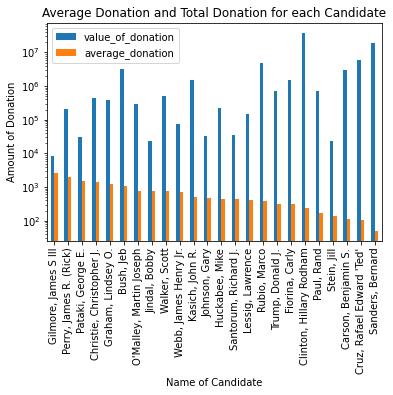

In [19]:
# 2e YOUR CODE HERE

track_donations.plot(x='candidate_name', y=['value_of_donation', 'average_donation'], kind='bar')

plt.yscale('log')
plt.title('Average Donation and Total Donation for each Candidate')
plt.xlabel('Name of Candidate')
plt.ylabel('Amount of Donation')

**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f YOUR RESPONSE HERE`

Sanders, Bernard attracts more contributions than any of his other colleagues. However, most of his contribution is smaller in average than contribution towards other candidates and can say that he has contributors of different earning capacity. 

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [22]:
# 3a YOUR CODE HERE

#Assumptions: Since the question asks to use value_counts, the "Top" variable used a panda series because value_counts can only be used on a series. As for the part of the question that asks to subset the data to create a dataframe with only donations for Hillary Clinton, this part is already a dataframe and in the next step, I have converted to a series in order to apply value_counts.
hillary = contrib_filtered[contrib_filtered['cand_nm'] == "Clinton, Hillary Rodham" ]
Top = pd.Series(hillary['contbr_occupation']).value_counts().head()

Top

RETIRED                  33121
ATTORNEY                  7148
INFORMATION REQUESTED     4741
TEACHER                   3575
HOMEMAKER                 3360
Name: contbr_occupation, dtype: int64

**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [23]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    return pd.Series(df['contbr_occupation']).value_counts().head()

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [24]:
# 3c YOUR CODE HERE
bernie = contrib_filtered[contrib_filtered['cand_nm'] == "Sanders, Bernard" ]
donald = contrib_filtered[contrib_filtered['cand_nm'] == "Trump, Donald J." ]
hillary = contrib_filtered[contrib_filtered['cand_nm'] == "Clinton, Hillary Rodham" ]

print(get_donors(bernie))
print(get_donors(donald))
print(get_donors(hillary))

NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64
RETIRED                  831
INFORMATION REQUESTED     69
CEO                       52
OWNER                     50
PRESIDENT                 34
Name: contbr_occupation, dtype: int64
RETIRED                  33121
ATTORNEY                  7148
INFORMATION REQUESTED     4741
TEACHER                   3575
HOMEMAKER                 3360
Name: contbr_occupation, dtype: int64


**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [25]:
# 3d YOUR CODE HERE

grouped = contrib_filtered.groupby(["cand_nm"]).apply(get_donors)

grouped

cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e. Comment on your data insights & findings in a short paragraph.**

`3e YOUR RESPONSE HERE`

For most of the candidates, RETIRED people are the frequent contributors. ATTORNEY, ENGINEER, HOMEMAKER people are the other frequent contributors. It is also very interesting to see that Gilmore, James S III had the least amount of frequent contributions with 1 from COB, INVESTMENT MANAGEMENT, and FINANCIAL ADVISOR.

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f YOUR RESPONSE HERE`

As we concluded that Sanders, Bernard attracts significant contribution from lower income section, we can clearly see that most of his contributors are NOT EMPLOYED.


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

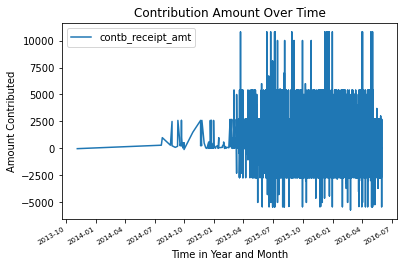

In [26]:
# 4a YOUR CODE HERE

ax = contrib_filtered.plot(x='contb_receipt_dt', y=['contb_receipt_amt'])
plt.tick_params(axis='x', which='major', labelsize=7)
plt.title('Contribution Amount Over Time')
plt.xlabel('Time in Year and Month')
plt.ylabel('Amount Contributed')
plt.show()

**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

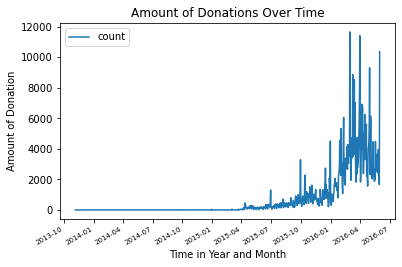

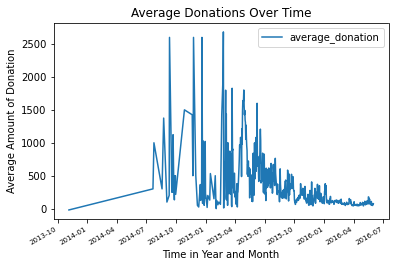

In [27]:
# 4b YOUR CODE HERE

contrib = pd.DataFrame({"count":contrib_filtered.groupby(["contb_receipt_dt"]).size()}).sort_values(by='contb_receipt_dt').reset_index()

contr = contrib_filtered.groupby(['contb_receipt_dt']).contb_receipt_amt.sum()

time_donations = pd.merge(contrib, contr,on='contb_receipt_dt')

time_donations['average_donation'] = time_donations['contb_receipt_amt'] / time_donations['count']

ax = contrib.plot(x="contb_receipt_dt", y=["count"])
plt.tick_params(axis='x', which='major', labelsize=7)
plt.title("Amount of Donations Over Time")
plt.xlabel('Time in Year and Month')
plt.ylabel('Amount of Donation')
plt.show()

ax = time_donations.plot(x="contb_receipt_dt", y=["average_donation"])
plt.tick_params(axis='x', which='major', labelsize=7)
plt.title("Average Donations Over Time")
plt.xlabel('Time in Year and Month')
plt.ylabel('Average Amount of Donation')
plt.show()

`4b YOUR RESPONSE HERE`

For the Amount of Donation Over Time plot, we can clearly see that number of contributor goes up as the election approaches.

As for the Average Donations Over Time plot, we can see that the average donation amount increases in the middle of the campaign as most of the largest contributions was in this period, but the average goes down over time as the election approaches.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k